In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from general import GeneralUtil as util
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
pd.options.plotting.backend = 'plotly'


In [6]:
df = pd.read_csv('../data/players_22.csv')
util.print("Original DF", header=True, color='blue')
util.print(df)

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_91268/1887081563.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/players_22.csv')


# -----------
# Original DF
# -----------


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,19239.0,2.314681e+05,2.703972e+04,41.0,214413.5,236543.0,253532.5,264640.0
overall,19239.0,6.577218e+01,6.880232e+00,47.0,61.0,66.0,70.0,93.0
potential,19239.0,7.107937e+01,6.086213e+00,49.0,67.0,71.0,75.0,95.0
value_eur,19165.0,2.850452e+06,7.613700e+06,9000.0,475000.0,975000.0,2000000.0,194000000.0
wage_eur,19178.0,9.017989e+03,1.947018e+04,500.0,1000.0,3000.0,8000.0,350000.0
...,...,...,...,...,...,...,...,...
goalkeeping_handling,19239.0,1.619247e+01,1.683953e+01,2.0,8.0,11.0,14.0,92.0
goalkeeping_kicking,19239.0,1.605536e+01,1.656455e+01,2.0,8.0,11.0,14.0,93.0
goalkeeping_positioning,19239.0,1.622927e+01,1.705978e+01,2.0,8.0,11.0,14.0,92.0
goalkeeping_reflexes,19239.0,1.649181e+01,1.788483e+01,2.0,8.0,11.0,14.0,90.0


In [9]:
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [10]:
df.isnull().sum().sort_values(ascending=False)[:10].reset_index().rename(columns={'index':'column', 0:'missing'}).style.background_gradient(cmap='Reds')

,column,missing
0,nation_jersey_number,18480
1,nation_logo_url,18480
2,nation_position,18480
3,nation_team_id,18480
4,club_loaned_from,18137
5,player_tags,17798
6,goalkeeping_speed,17107
7,player_traits,9841
8,dribbling,2132
9,shooting,2132


In [11]:
# Visualize the missing values in the dataset
fig = px.bar(df.isnull().sum().sort_values(ascending=False)[:10], 
             title='Missing Values', 
             labels={'index':'Feature', 'value':'Missing Values Count'}, template='plotly_white')
fig.show()

In [12]:
# How players from each country are there?
players_origin = df['nationality_name'].value_counts()[:15]

fix = px.pie(players_origin, players_origin.index, players_origin.values, color_discrete_sequence=px.colors.sequential.Turbo)
fix.update_traces(textposition='outside', textinfo='percent+label')
fix.update_layout(title_text='Players from each country')
fix.show()

In [13]:
# How players from each club are there?
players_club = df['club_name'].value_counts().reset_index().rename(columns={'index': 'club_name', 'club_name': 'count'})

fig = px.bar(players_club, x='club_name', y='count', color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title_text='Players from each club')
fig.show()


In [14]:
# Who are the players with the maximum potential, and maximum overall performance?
max_potential = df.loc[df['potential'].idxmax()][3]
max_overall = df.loc[df['overall'].idxmax()][3]

print(f"Player with maximum potential: {max_potential}")
print(f"Player with maximum overall: {max_overall}")

Player with maximum potential: Kylian Mbappé Lottin
Player with maximum overall: Lionel Andrés Messi Cuccittini


In [15]:
df.loc[df['potential'].idxmax()][6]

95

In [16]:
# Who is the most expensive player?
max_value = df.loc[df['wage_eur'].idxmax()][3]
print(f"Most expensive player: {max_value}")

# Stats of the most expensive player
max_value_stats = df.loc[df['wage_eur'].idxmax()][['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur']]
print(max_value_stats)

Most expensive player: Kevin De Bruyne
age                   30
height_cm            181
weight_kg             70
overall               91
potential             91
value_eur    125500000.0
wage_eur        350000.0
Name: 4, dtype: object


In [17]:
# Who is the most expensive player?
max_value = df.loc[df['value_eur'].idxmax()][3]
print(f"Most expensive player: {max_value}")

# Stats of the most expensive player
max_value_stats = df.loc[df['wage_eur'].idxmax()][['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur']]
print(max_value_stats)

Most expensive player: Kylian Mbappé Lottin
age                   30
height_cm            181
weight_kg             70
overall               91
potential             91
value_eur    125500000.0
wage_eur        350000.0
Name: 4, dtype: object


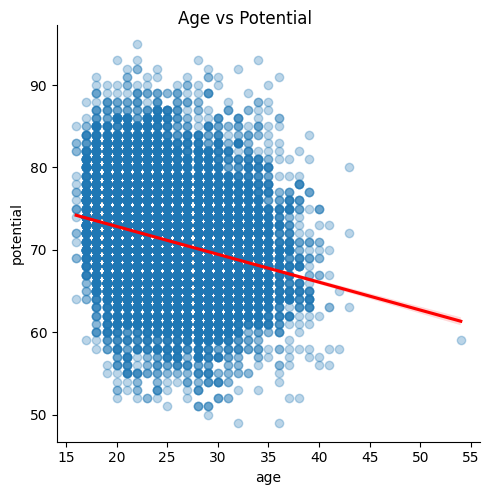

In [18]:
%matplotlib inline
fig = sns.lmplot(x='age', y='potential', data=df, height=5, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
fig.fig.suptitle('Age vs Potential')
fig.fig.subplots_adjust(top=0.95)
plt.show()


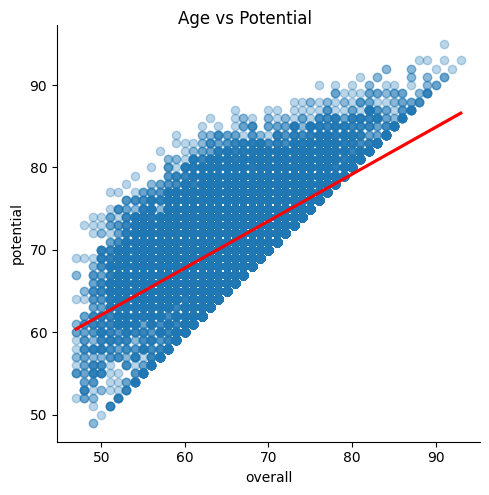

In [19]:
%matplotlib inline
fig = sns.lmplot(x='overall', y='potential', data=df, height=5, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
fig.fig.suptitle('Age vs Potential')
fig.fig.subplots_adjust(top=0.95)
plt.show()


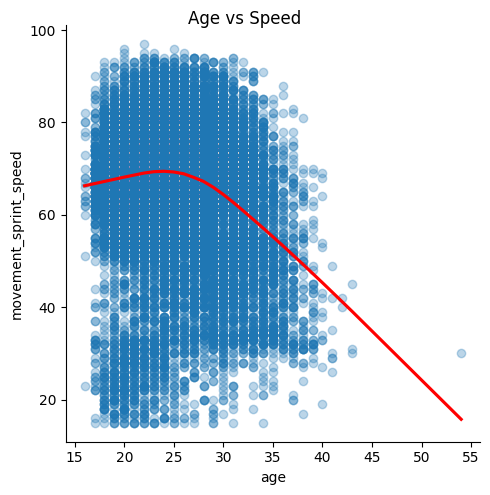

In [20]:
%matplotlib inline
# Age against overall performance shown in a joint plot
fig = sns.lmplot(x='age', y='movement_sprint_speed', data=df, height=5, lowess=True, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
fig.fig.suptitle('Age vs Speed')
fig.fig.subplots_adjust(top=0.95)
plt.show()


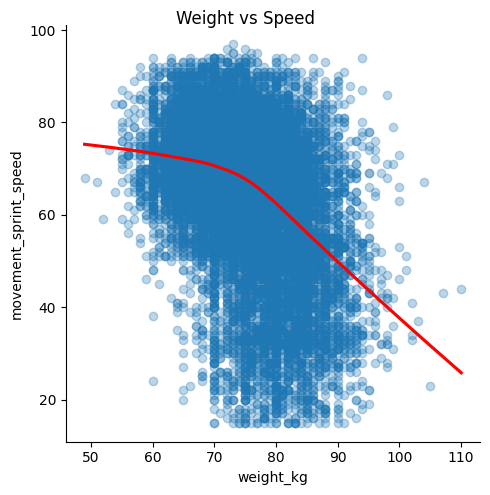

In [21]:
%matplotlib inline
# Age against overall performance shown in a joint plot
fig = sns.lmplot(x='weight_kg', y='movement_sprint_speed', data=df, height=5, lowess=True, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
fig.fig.suptitle('Weight vs Speed')
fig.fig.subplots_adjust(top=0.95)
plt.show()



In [35]:
# Correlation between the weight_kg and movement_sprint_speed
df[['age', 'potential']].corr()

,age,potential
age,1.000000,-0.264142
potential,-0.264142,1.000000


Text(0.5, 1.0, 'Overall vs Potential')

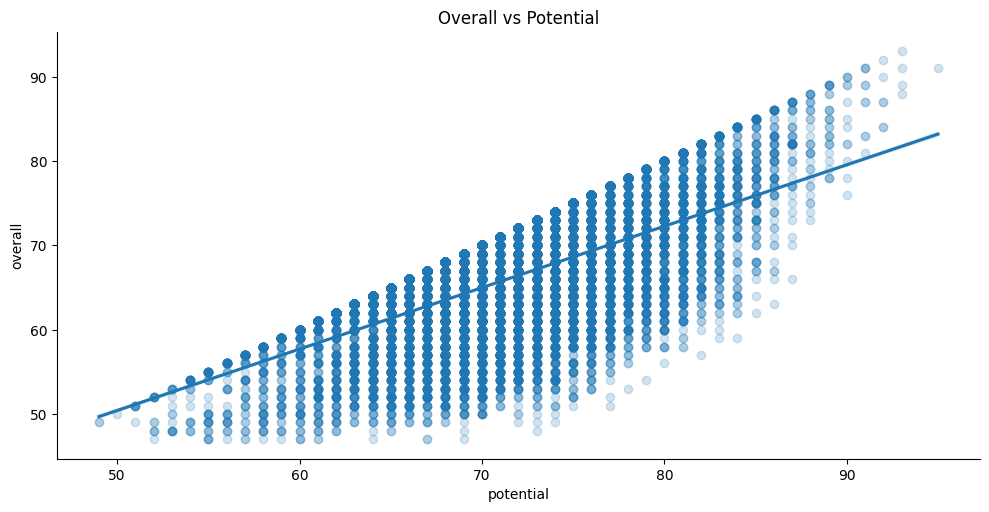

In [22]:
# Plot the linera regression of the overall performance against the potential
sns.lmplot(x='potential', y='overall', data=df, fit_reg=True, height=5, aspect=2, scatter_kws={'alpha':0.2})
plt.title('Overall vs Potential')

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_91268/2533413810.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Features with the highest correlation to value')

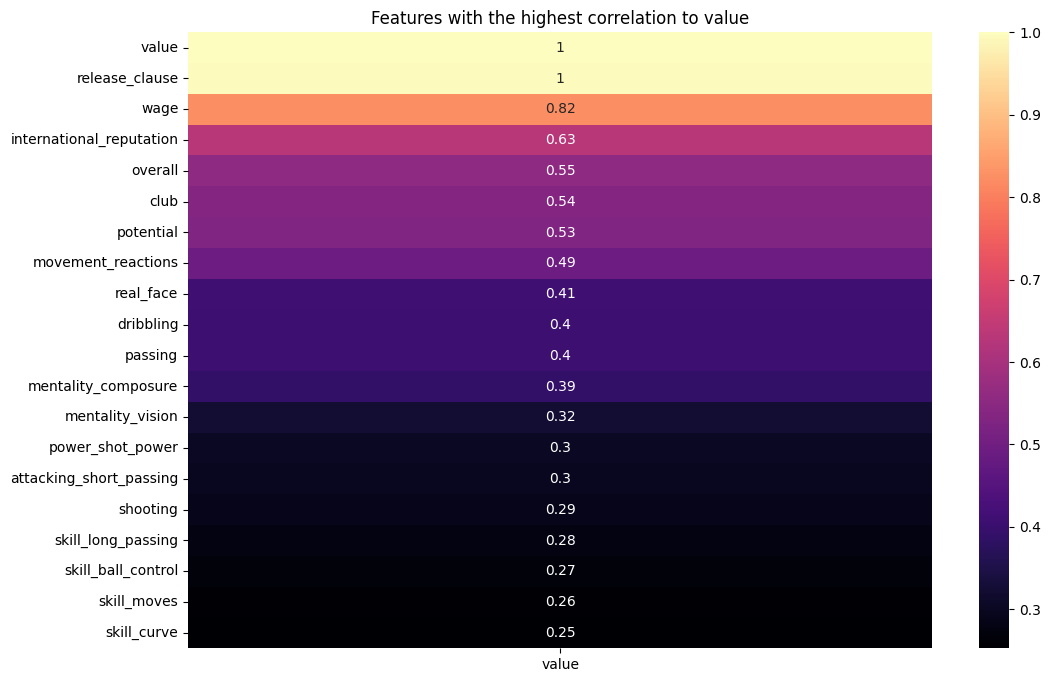

In [27]:
# Heatmap of the featues with the highest correlation to value in fifa df
plt.figure(figsize=(12, 8))
sns.heatmap(fifa_df.corr()[['value']].sort_values(by='value', ascending=False)[:20], annot=True, cmap='magma')
plt.title('Features with the highest correlation to value')

In [73]:
# The highest value per player position in fifa df as well as their player stats
top_value = fifa_df.groupby('player_positions').agg({'pace': 'median', 'shooting': 'median',
                                                     'passing': 'median', 'dribbling': 'median', 'defending': 'median', 'physic': 'median'}).reset_index().dropna(axis=0)
top_value


,player_positions,pace,shooting,passing,dribbling,defending,physic
0,DEF,67.0,38.0,53.0,58.0,64.0,69.0
1,FWD,71.0,66.0,53.0,65.0,29.0,66.0
3,MID,70.0,58.0,62.0,66.0,51.0,62.0


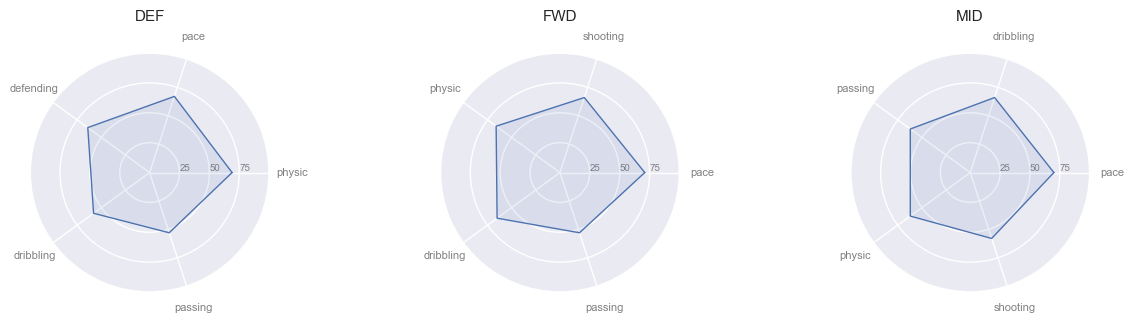

In [75]:
from math import pi
player_features = [
'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic'
]

idx = 1
plt.figure(figsize=(15, 45))
for position_name, features in top_value.groupby(top_value['player_positions'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))

    # number of variable
    categories = top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25, 50, 75], ["25", "50", "75"], color="grey", size=7)
    plt.ylim(0, 100)

    plt.subplots_adjust(hspace=0.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(position_name, size=11, y=1.1)

    idx += 1


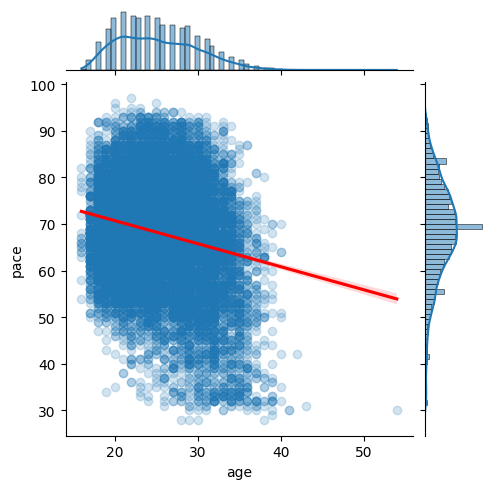

In [31]:
performance_age = df[['age', 'pace', 'shooting',
                      'passing', 'dribbling', 'defending', 'physic']]

sns.jointplot(x='age', y='pace', data=performance_age, kind='reg', height=5, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})

# Data Cleaning 

In soccer, positions are typically referred to using abbreviations. Here are some common ones:

  - GK: Goalkeeper
  - CB: Center back
  - LB: Left back
  - RB: Right back
  - LW: Left winger
  - RW: Right winger
  - CM: Center midfielder
  - CDM: Center defensive midfielder
  - CAM: Center attacking midfielder
  - ST: Striker

In [24]:
unwated_columns = [
    "sofifa_id",
    "player_url",
    "dob",
    "long_name",
    "short_name",
    # 'player_positions',
    "league_name",
    "nationality_name",
    "club_contract_valid_until",
    "club_position",
    "club_loaned_from",
    "club_joined",
    "work_rate",
    "player_tags",
    "player_traits",
    "player_face_url",
    "body_type",
    "nation_position",
    "club_logo_url",
    "club_flag_url",
    "nation_logo_url",
    "nation_flag_url",
    "goalkeeping_speed",
    "ls",
    "st",
    "rs",
    "lw",
    "lf",
    "cf",
    "rf",
    "rw",
    "lam",
    "cam",
    "ram",
    "lm",
    "lcm",
    "cm",
    "rcm",
    "rm",
    "lwb",
    "ldm",
    "cdm",
    "rdm",
    "rwb",
    "lb",
    "lcb",
    "cb",
    "rcb",
    "rb",
    "gk",
]

fifa_df = df.drop(unwated_columns, axis=1).copy()

# Rename the columns to make it more readable
fifa_df.rename(
    columns={
        "wage_eur": "wage",
        "value_eur": "value",
        "release_clause_eur": "release_clause",
        "club_name": "club",
    },
    inplace=True,
)

# Change boolean columns to either 0 or 1
fifa_df["real_face"] = fifa_df["real_face"].apply(lambda x: 1 if x == "Yes" else 0)

# Change the player positions to a list, and only use the firsr position
fifa_df["player_positions"] = fifa_df["player_positions"].apply(
    lambda x: x.split(",")[0]
)

# Simplify the player positions
def simplify_position(position):
    if position in ["GK"]:
        return "GK"
    elif position in ["CB", "LB", "RB", "LCB", "RCB", "LWB", "RWB"]:
        return "DEF"
    elif position in ["CDM", "CM", "CAM", "LM", "RM", "LW", "RW"]:
        return "MID"
    elif position in ["ST", "CF", "LF", "RF"]:
        return "FWD"
    else:
        return position


fifa_df["player_positions"] = fifa_df["player_positions"].apply(simplify_position)

# Change club name to 1 if it belongs to the top 20 clubs, and 0 otherwise
top_clubs = (
    fifa_df.groupby("club")["value"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index.tolist()
)


def change_club_name(club_name):
    if club_name in top_clubs:
        return 1
    else:
        return 0


fifa_df["club"] = fifa_df["club"].apply(change_club_name)

# Check for infinate values
fifa_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [28]:
fifa_df

,player_positions,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,club,league_level,club_jersey_number,nationality_id,nation_team_id,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,real_face,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,MID,93,93,78000000.0,320000.0,34,170,72,73.0,1,1.0,30.0,52,1369.0,10.0,Left,4,4,5,1,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,FWD,92,92,119500000.0,270000.0,32,185,81,21.0,1,1.0,9.0,37,1353.0,9.0,Right,4,4,5,1,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,FWD,91,91,45000000.0,270000.0,36,187,83,11.0,1,1.0,7.0,38,1354.0,7.0,Right,4,5,5,1,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,MID,91,91,129000000.0,270000.0,29,175,68,73.0,1,1.0,10.0,54,NaN,NaN,Right,5,5,5,1,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,MID,91,91,125500000.0,350000.0,30,181,70,10.0,1,1.0,17.0,7,1325.0,7.0,Right,5,4,4,1,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,MID,47,52,70000.0,1000.0,22,180,64,112541.0,0,1.0,36.0,155,NaN,NaN,Right,3,2,1,0,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13
19235,MID,47,59,110000.0,500.0,19,175,70,445.0,0,1.0,27.0,25,NaN,NaN,Right,3,2,1,0,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10
19236,MID,47,55,100000.0,500.0,21,178,72,111131.0,0,1.0,31.0,25,NaN,NaN,Right,3,2,1,0,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6
19237,FWD,47,60,110000.0,500.0,19,173,66,111131.0,0,1.0,12.0,25,NaN,NaN,Right,3,2,1,0,239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15


## Modeling with dummy variables

<AxesSubplot: >

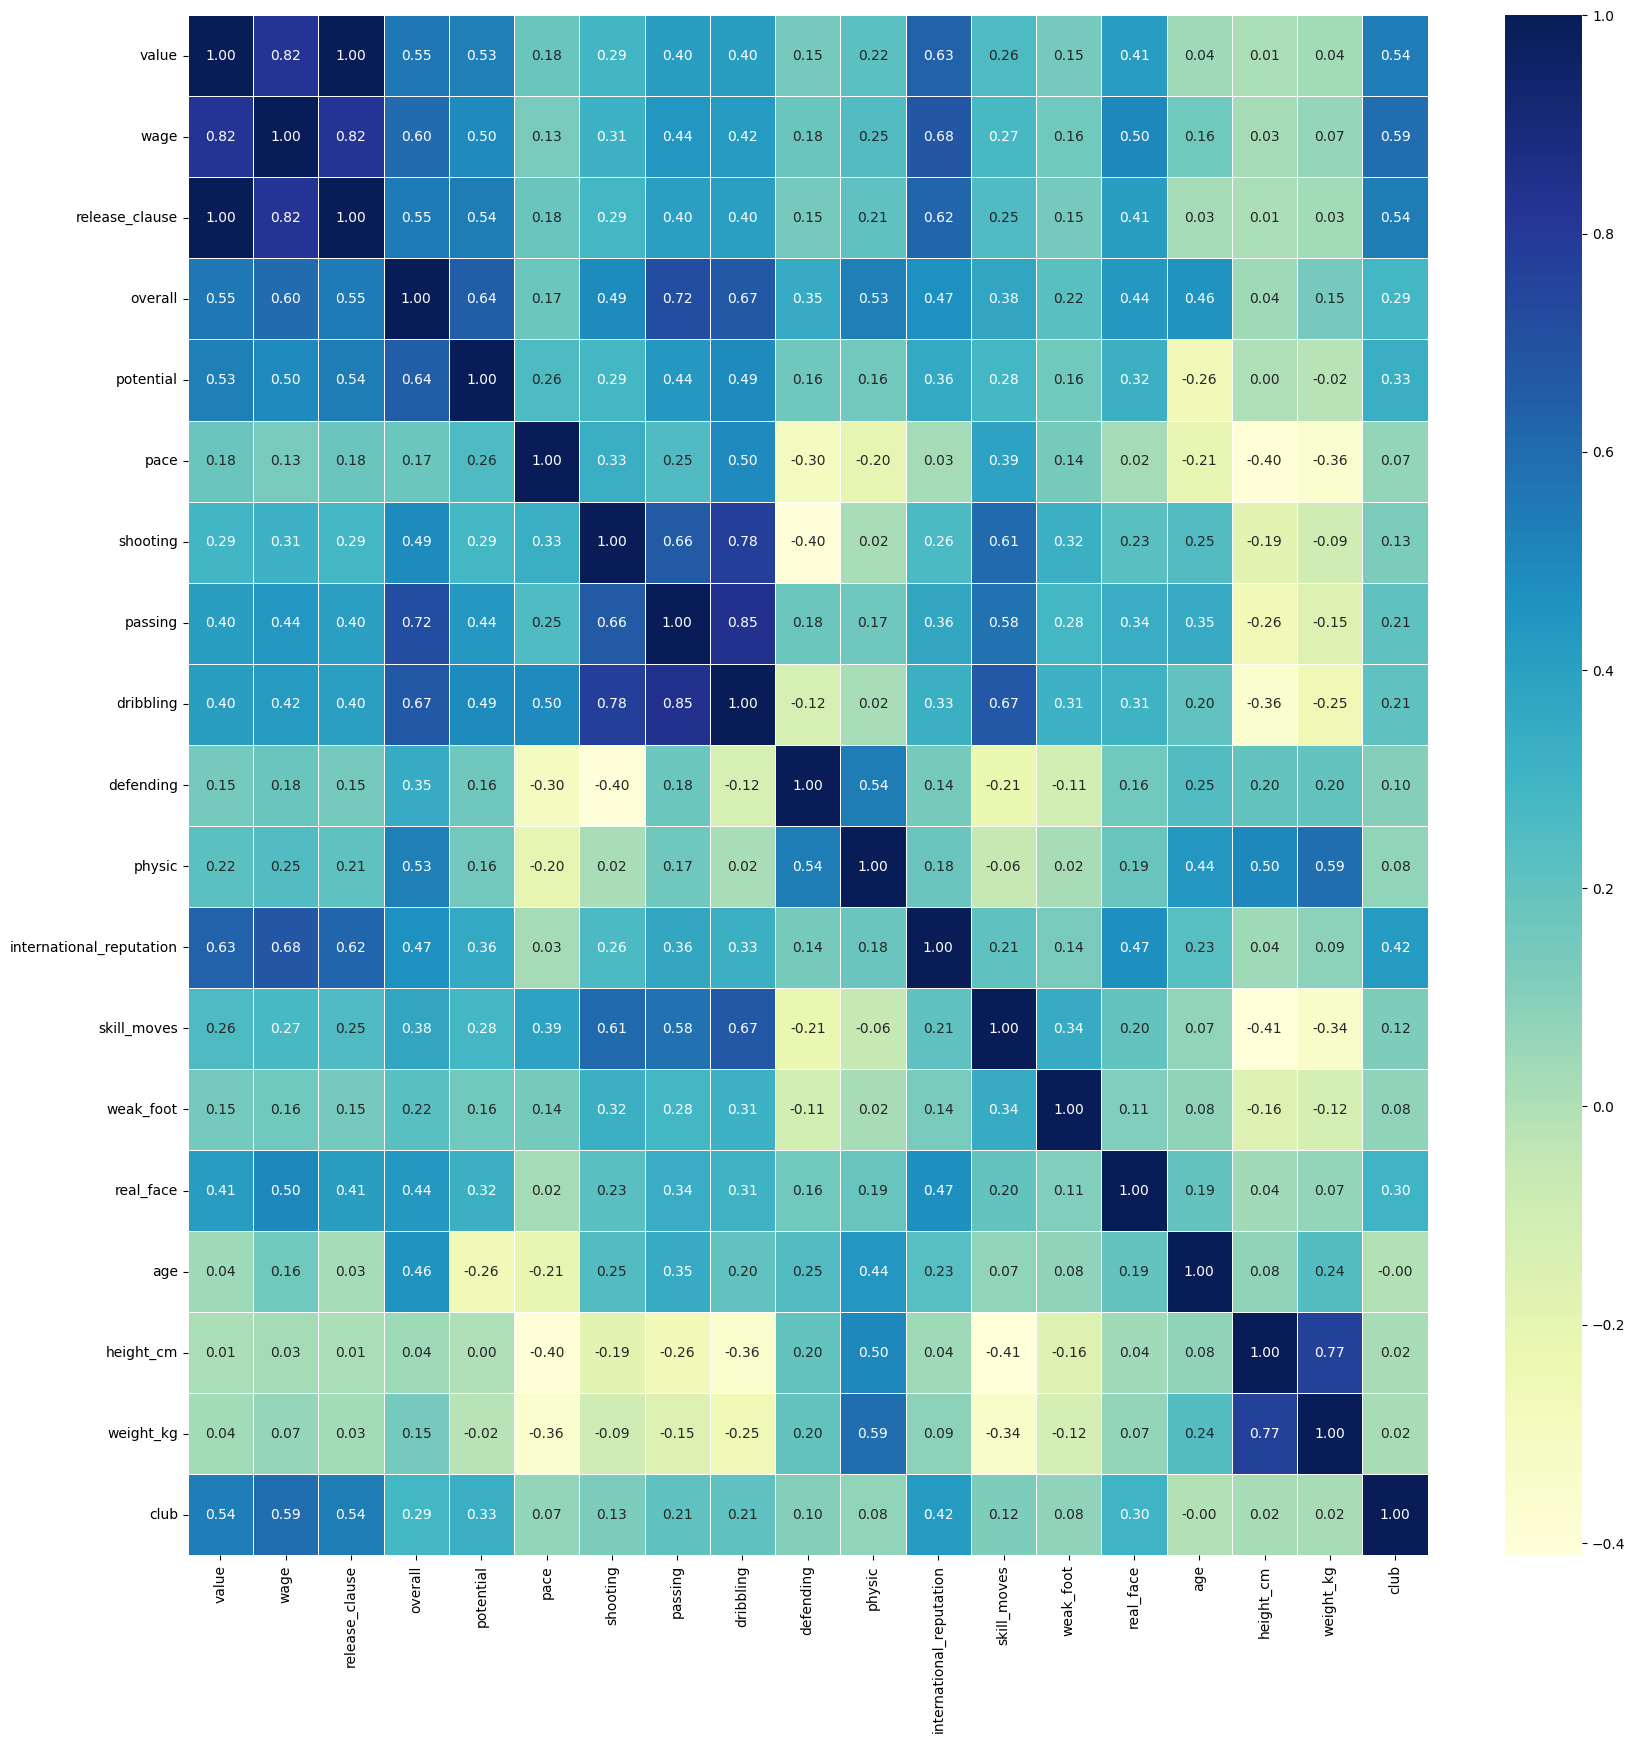

In [32]:
# Build heatmap correlation matrix with only the top features correlated with value
top_features = [
    "value",
    "wage",
    "release_clause",
    "overall",
    "potential",
    "pace",
    "shooting",
    "passing",
    "dribbling",
    "defending",
    "physic",
    "international_reputation",
    "skill_moves",
    "weak_foot",
    "real_face",
    "age",
    "height_cm",
    "weight_kg",
    "club",
]
corr = fifa_df[top_features].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

In [413]:
from statistics import mean
from sklearn.impute import SimpleImputer

model_df = fifa_df.copy()
# Create dummy variables for the categorical columns
model_df = pd.get_dummies(model_df, drop_first=True)
model_df.dropna(subset=["wage", "value", "release_clause"], inplace=True)

# Impute the missing values with mean
imputer = SimpleImputer(strategy="mean")
model_df = pd.DataFrame(imputer.fit_transform(model_df), columns=model_df.columns)
model_df

,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,club,league_level,club_jersey_number,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,real_face,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions_FWD,player_positions_GK,player_positions_MID,preferred_foot_Right
0,93.0,93.0,78000000.0,320000.0,34.0,170.0,72.0,73.0,1.0,1.0,30.0,52.0,1369.000000,10.000000,4.0,4.0,5.0,1.0,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0.0,0.0,1.0,0.0
1,92.0,92.0,119500000.0,270000.0,32.0,185.0,81.0,21.0,1.0,1.0,9.0,37.0,1353.000000,9.000000,4.0,4.0,5.0,1.0,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,1.0,0.0,0.0,1.0
2,91.0,91.0,45000000.0,270000.0,36.0,187.0,83.0,11.0,1.0,1.0,7.0,38.0,1354.000000,7.000000,4.0,5.0,5.0,1.0,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,1.0,0.0,0.0,1.0
3,91.0,91.0,129000000.0,270000.0,29.0,175.0,68.0,73.0,1.0,1.0,10.0,54.0,13663.050975,12.484258,5.0,5.0,5.0,1.0,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0.0,0.0,1.0,1.0
4,91.0,91.0,125500000.0,350000.0,30.0,181.0,70.0,10.0,1.0,1.0,17.0,7.0,1325.000000,7.000000,5.0,4.0,4.0,1.0,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,47.0,52.0,70000.0,1000.0,22.0,180.0,64.0,112541.0,0.0,1.0,36.0,155.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46.0,32.0,48.0,50.0,30.0,45.0,33.0,38.0,48.0,49.0,56.0,60.0,55.0,53.0,70.0,46.0,62.0,51.0,46.0,30.0,52.0,42.0,38.0,43.0,42.0,37.0,38.0,43.0,48.0,6.0,10.0,5.0,15.0,13.0,0.0,0.0,1.0,1.0
18059,47.0,59.0,110000.0,500.0,19.0,175.0,70.0,445.0,0.0,1.0,27.0,25.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54.0,33.0,46.0,51.0,32.0,41.0,53.0,31.0,50.0,42.0,60.0,58.0,64.0,49.0,69.0,49.0,47.0,63.0,47.0,38.0,49.0,39.0,51.0,49.0,44.0,47.0,37.0,44.0,47.0,11.0,12.0,6.0,8.0,10.0,0.0,0.0,1.0,1.0
18060,47.0,55.0,100000.0,500.0,21.0,178.0,72.0,111131.0,0.0,1.0,31.0,25.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39.0,32.0,43.0,49.0,37.0,47.0,37.0,37.0,49.0,49.0,60.0,60.0,58.0,46.0,59.0,50.0,57.0,56.0,50.0,34.0,51.0,38.0,45.0,46.0,39.0,36.0,38.0,44.0,48.0,8.0,6.0,7.0,10.0,6.0,0.0,0.0,1.0,1.0
18061,47.0,60.0,110000.0,500.0,19

In [312]:
# Outlier detection
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (
            df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers


outliers_to_drop = detect_outliers(model_df, 2, ['wage'])
model_df = model_df.drop(outliers_to_drop, axis=0).reset_index(drop=True)
model_df

,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,club,league_level,club_jersey_number,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,real_face,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions_FWD,player_positions_GK,player_positions_MID,preferred_foot_Right
0,82.0,87.0,35000000.0,1000.0,26.0,187.0,79.0,211.0,0.0,1.0,40.0,10.0,13663.050975,12.484258,3.0,1.0,2.0,0.0,79600000.0,68.080087,52.182272,57.28764,62.441074,51.883458,64.86161,13.0,12.0,13.0,46.0,10.0,19.0,12.0,11.0,56.0,28.0,57.0,54.0,65.0,80.0,30.0,56.0,61.0,32.0,75.0,9.0,26.0,21.0,11.0,60.0,15.0,64.0,24.0,20.0,21.0,81.0,78.0,74.0,80.0,85.0,0.0,1.0,0.0,1.0
1,81.0,81.0,2900000.0,24000.0,36.0,185.0,82.0,219.0,0.0,1.0,30.0,18.0,1335.000000,16.000000,3.0,1.0,3.0,1.0,5500000.0,68.080087,52.182272,57.28764,62.441074,51.883458,64.86161,14.0,13.0,13.0,46.0,13.0,19.0,13.0,12.0,36.0,27.0,53.0,43.0,52.0,80.0,36.0,59.0,69.0,31.0,61.0,7.0,37.0,23.0,11.0,55.0,11.0,62.0,13.0,15.0,13.0,80.0,80.0,78.0,81.0,81.0,0.0,1.0,0.0,1.0
2,81.0,81.0,16000000.0,2000.0,33.0,174.0,76.0,101059.0,0.0,1.0,11.0,49.0,1366.000000,11.000000,3.0,5.0,2.0,0.0,33600000.0,79.000000,76.000000,78.00000,86.000000,47.000000,68.00000,75.0,76.0,53.0,80.0,68.0,87.0,82.0,72.0,73.0,88.0,77.0,80.0,85.0,75.0,84.0,77.0,66.0,70.0,72.0,78.0,58.0,51.0,72.0,82.0,80.0,84.0,45.0,46.0,42.0,6.0,13.0,13.0,8.0,9.0,0.0,0.0,1.0,0.0
3,81.0,81.0,13000000.0,2000.0,32.0,188.0,85.0,280.0,0.0,1.0,1.0,12.0,1330.000000,1.000000,3.0,1.0,1.0,0.0,27300000.0,68.080087,52.182272,57.28764,62.441074,51.883458,64.86161,15.0,14.0,19.0,17.0,13.0,14.0,17.0,16.0,38.0,20.0,42.0,37.0,43.0,78.0,56.0,56.0,73.0,38.0,73.0,16.0,29.0,23.0,15.0,68.0,13.0,60.0,20.0,18.0,18.0,83.0,77.0,74.0,80.0,84.0,0.0,1.0,0.0,1.0
4,80.0,80.0,2300000.0,18000.0,43.0,192.0,92.0,50.0,0.0,2.0,1.0,27.0,13663.050975,12.484258,2.0,1.0,4.0,1.0,4100000.0,68.080087,52.182272,57.28764,62.441074,51.883458,64.86161,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,28.0,37.0,30.0,55.0,78.0,49.0,53.0,69.0,34.0,65.0,13.0,38.0,28.0,12.0,50.0,22.0,70.0,13.0,11.0,11.0,76.0,73.0,70.0,90.0,76.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16076,47.0,52.0,70000.0,1000.0,22.0,180.0,64.0,112541.0,0.0,1.0,36.0,155.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,114000.0,58.000000,35.000000,46.00000,48.000000,42.000000,49.00000,46.0,32.0,48.0,50.0,30.0,45.0,33.0,38.0,48.0,49.0,56.0,60.0,55.0,53.0,70.0,46.0,62.0,51.0,46.0,30.0,52.0,42.0,38.0,43.0,42.0,37.0,38.0,43.0,48.0,6.0,10.0,5.0,15.0,13.0,0.0,0.0,1.0,1.0
16077,47.0,59.0,110000.0,500.0,19.0,175.0,70.0,445.0,0.0,1.0,27.0,25.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,193000.0,59.000000,39.000000,50.00000,46.000000,41.000000,51.00000,54.0,33.0,46.0,51.0,32.0,41.0,53.0,31.0,50.0,42.0,60.0,58.0,64.0,49.0,69.0,49.0,47.0,63.0,47.0,38.0,49.0,39.0,51.0,49.0,44.0,47.0,37.0,44.0,47.0,11.0,12.0,6.0,8.0,10.0,0.0,0.0,1.0,1.0
16078,47.0,55.0,100000.0,500.0,21.0,178.0,72.0,111131.0,0.0,1.0,31.0,25.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,175000.0,60.000000,37.000000,45.00000,49.000000,41.000000,52.00

In [415]:
# Prepare X and y
X, y = model_df.drop(["wage"], axis=1).copy(), model_df["wage"].copy()

### Modeling with OLS

In [416]:
X_ = sm.add_constant(X)
fit = sm.OLS(y, X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              1351.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                        0.00
Time:                        23:46:52   Log-Likelihood:                     -1.9014e+05
No. Observations:               18063   AIC:                                  3.804e+05
Df Residuals:                   18001   BIC:                                  3.809e+05
Df Model:                          62                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
overall                       518.9589     40.229     12.900      0.000     440.106     597.812
potential                    -198.0927     26.340     -7.521      0.000    -249.721    -146.464
value                           0.0017   9.65e-05     17.232      0.000       0.001       0.002
age                           -13.5333     30.823     -0.439      0.661     -73.950      46.883
height_cm                     -75.6626     10.677     -7.086      0.000     -96.591     -54.734
weight_kg                       6.1594     17.190      0.358      0.720     -27.534      39.853
club_team_id                   -0.0224      0.001    -16.135      0.000      -0.025      -0.020
club                          2.16e+04    456.057     47.357      0.000    2.07e+04    2.25e+04
league_level                 -291.4038    102.204     -2.851      0.004    -491.733     -91.075
club_jersey_number              5.1115      4.003      1.277      0.202      -2.735      12.958
nationality_id                  4.6610      1.516      3.074      0.002       1.689       7.634
nation_team_id                 -0.0414      0.010     -4.043      0.000      -0.062      -0.021
nation_jersey_number         -482.8690     49.827     -9.691      0.000    -580.536    -385.202
weak_foot                    -182.6268    110.885     -1.647      0.100    -399.971      34.718
skill_moves                    -8.9973    164.140     -0.055      0.956    -330.726     312.732
international_reputation     8446.2679    263.269     32.082      0.000    7930.235    8962.301
real_face                    4991.4771    257.866     19.357      0.000    4486.035    5496.919
release_clause                 -0.0002   4.92e-05     -3.918      0.000      -0.000   -9.62e-05
pace                          -31.1668     27.915     -1.116      0.264     -85.883      23.549
shooting                       79.4630     90.801      0.875      0.382     -98.515     257.441
passing                       -69.5459     52.218     -1.332      0.183    -171.898      32.806
dribbling                     -13.4546     75.079     -0.179      0.858    -160.618     133.708
defending                      26.9926     85.040      0.317      0.751    -139.694     193.679
physic                          2.7708     36.514      0.076      0.940     -68.800      74.342
attacking_crossing             29.8789     14.583      2.049      0.040       1.295      58.462
attacking_finishing           -47.3756     41.989     -1.128      0.259    -129.679      34.928
attacking_heading_accuracy     34.3803     13.565      2.534      0.011       7.791      60.970
attacking_short_passing       -27.0463     22.288     -1.214      0.225     -70.732      16.640
attackin

In [235]:
# Let's test for collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,11272.052626,const
1,17.183189,overall
2,6.126812,potential
3,30.764543,value
4,5.190410,age
...,...,...
59,75.626501,goalkeeping_speed
60,5.541692,player_positions_FWD
61,934.494250,player_positions_GK
62,4.397008,player_positions_MID


Since the VIF values are greater than 10, there is collinearity between the values.

#### Backward Elimination

In [315]:
# Let's create a backward elimination function that will remove the features with the highest p-values, and store the results of AIC, BIC and R-squared in a dataframe
def backwardElimination(X, y, alpha=0.05):
    model_results = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared', 'features'])
    cols = X.columns.tolist()
    pmax = 1
    model_num = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        # Add AIC BIC And R-squared to the model_results dataframe
        model_results.loc[len(model_results)] = [f'model {model_num}: {len(cols)} feat', model.aic, model.bic, model.rsquared, cols.copy()]
        model_num += 1
        p = pd.Series(model.pvalues.values[1:], index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax > alpha):
            cols.remove(feature_with_p_max)
        else:
            break
    included = cols

    return included, model_results

selected_features_BE, model_results_BE = backwardElimination(X, y)
print(selected_features_BE)
model_results_BE


['overall', 'potential', 'value', 'age', 'height_cm', 'club_team_id', 'club', 'league_level', 'club_jersey_number', 'nationality_id', 'nation_jersey_number', 'international_reputation', 'real_face', 'release_clause', 'shooting', 'dribbling', 'physic', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_dribbling', 'movement_sprint_speed', 'movement_reactions', 'power_shot_power', 'power_long_shots', 'mentality_aggression', 'defending_sliding_tackle', 'goalkeeping_positioning', 'player_positions_FWD']


,Model,AIC,BIC,R-squared,features
0,model 1: 62 feat,313253.222140,313737.401945,0.422773,"[overall, potential, value, age, height_cm, we..."
1,model 2: 61 feat,313251.223356,313727.717767,0.422773,"[overall, potential, value, age, height_cm, we..."
2,model 3: 60 feat,313249.231256,313718.040274,0.422773,"[overall, potential, value, age, height_cm, we..."
3,model 4: 59 feat,313247.249456,313708.373079,0.422772,"[overall, potential, value, age, height_cm, we..."
4,model 5: 58 feat,313245.280069,313698.718299,0.422771,"[overall, potential, value, age, height_cm, we..."
...,...,...,...,...,...
29,model 30: 33 feat,313221.171635,313482.475022,0.421841,"[overall, potential, value, age, height_cm, cl..."
30,model 31: 32 feat,313220.141350,313473.759343,0.421806,"[overall, potential, value, age, height_cm, cl..."
31,model 32: 31 feat,313220.549358,313466.481957,0.421719,"[overall, potential, value, age, height_cm, cl..."
32,model 33: 30 feat,313221.215972,313459.463178,0.421623,"[overall, potential, value, age, height_cm, cl..."


In [180]:
# Plot the model with the highest lowest AIC, BIC and R-squared
model_results_BE.sort_values(by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1)

,Model,AIC,BIC,R-squared,features
33,model 34: 30 feat,405480.748432,405724.553969,0.78023,"[overall, potential, value, club_team_id, club..."


In [187]:
fig = px.bar(model_results_BE, x='Model', y='R-squared', title='R-squared for each model', barmode='group')
fig.update_layout(yaxis_range=[.6,1])
fig.show()

In [188]:
fig = px.bar(model_results_BE, x='Model', y=[
       'AIC', 'BIC'], title='AIC & BIC for each model', barmode='group')
fig.update_layout(yaxis_range=[350000,420000])
fig.show()

Backward elimination didn't really work, as it's not clear which model is the best. Let's try forward elimination.

#### Forward Elimination

In [316]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Let's create a forward elimination function that will remove the features with the highest p-values, and store the results of AIC, BIC and R-squared in a dataframe
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.05, 
                       verbose=True):
    model_results = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared', 'features'])
    initial_list = []
    included = list(initial_list)
    model_num = 1
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            
            new_pval[new_column] = model.pvalues[new_column]
        model_results.loc[len(model_results)] = [
                f'model {model_num}: {len(included+[new_column])} feat', model.aic, model.bic, model.rsquared, included+[new_column]]
        model_num+=1
        best_pval = new_pval.min()
        
        if best_pval < threshold_in:
            
            # get the feature with the lowest p-value
            best_feature = new_pval.idxmin()
            # get the best feature and add it to the list
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add with p-value {best_pval:.3f}: {best_feature}')

        if not changed:
            break

    return included, model_results

selected_features_FR, model_results_FR = forward_regression(X, y)
print(selected_features_FR)
model_results_FR


Add with p-value 0.000: international_reputation
Add with p-value 0.000: release_clause
Add with p-value 0.000: real_face
Add with p-value 0.000: value
Add with p-value 0.000: club_team_id
Add with p-value 0.000: age
Add with p-value 0.000: height_cm
Add with p-value 0.000: overall
Add with p-value 0.000: movement_balance
Add with p-value 0.000: club
Add with p-value 0.000: attacking_heading_accuracy
Add with p-value 0.000: league_level
Add with p-value 0.000: potential
Add with p-value 0.000: power_stamina
Add with p-value 0.000: club_jersey_number
Add with p-value 0.000: movement_reactions
Add with p-value 0.000: power_shot_power
Add with p-value 0.000: attacking_short_passing
Add with p-value 0.002: nationality_id
Add with p-value 0.005: mentality_aggression
Add with p-value 0.001: physic
Add with p-value 0.022: player_positions_GK
Add with p-value 0.011: mentality_composure
['international_reputation', 'release_clause', 'real_face', 'value', 'club_team_id', 'age', 'height_cm', 'ove

,Model,AIC,BIC,R-squared,features
0,model 1: 1 feat,320233.160007,320240.845401,0.440869,[mentality_composure]
1,model 2: 2 feat,320224.550379,320239.921166,0.441238,"[international_reputation, mentality_composure]"
2,model 3: 3 feat,319127.761680,319150.817861,0.478142,"[international_reputation, release_clause, men..."
3,model 4: 4 feat,317826.950964,317857.692538,0.518754,"[international_reputation, release_clause, rea..."
4,model 5: 5 feat,317332.733934,317371.160903,0.533377,"[international_reputation, release_clause, rea..."
...,...,...,...,...,...
19,model 20: 20 feat,313472.391300,313626.099175,0.633646,"[international_reputation, release_clause, rea..."
20,model 21: 21 feat,313467.340012,313628.733281,0.633806,"[international_reputation, release_clause, rea..."
21,model 22: 22 feat,313460.066900,313629.145562,0.634018,"[international_reputation, release_clause, rea..."
22,model 23: 23 feat,313455.474658,313632.238714,0.634168,"[international_reputation, release_clause, rea..."


In [204]:
# Plot the model with the highest lowest AIC, BIC and R-squared
model_results_FR.sort_values(by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1)

,Model,AIC,BIC,R-squared,features
27,model 28: 28 feat,405540.224734,405760.436187,0.818535,"[international_reputation, power_stamina, goal..."


In [205]:
px.bar(model_results_FR, x='Model', y=[
       'AIC', 'BIC'], title='AIC & BIC for each model', barmode='group', text_auto=True)


In [206]:
px.bar(model_results_FR, x='Model', y=[
       'R-squared'], title='AIC & BIC for each model', barmode='group', text_auto=True)


### Stepwise Elimination

In [317]:
# Let's create a stepwise elimination function that will remove the features with the highest p-values, and store the results of AIC, BIC and R-squared in a dataframe
def stepwise_regression(X, y,
                        initial_list=[],
                        threshold_in=0.05, 
                        threshold_out = 0.05, 
                        verbose=True):
    model_results = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared', 'features'])
    included = list(initial_list)
    model_num = 1
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            # get the feature with the lowest p-value
            best_feature = new_pval.idxmin()
            # get the best feature and add it to the list
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add with p-value {best_pval:.3f}: {best_feature}')

        model_results.loc[len(model_results)] = [
            f'model {model_num}: {len(included+[new_column])} feat', model.aic, model.bic, model.rsquared, included+[new_column]]
        model_num+=1
        # backward step
        model = sm.OLS(y, pd.DataFrame(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Remove with p-value {worst_pval:.3f}: {worst_feature}')
        if not changed:
            break
        
    return included, model_results

selected_features_SR, model_results_SR = stepwise_regression(X, y)
print(selected_features_SR)
model_results_SR

Add with p-value 0.000: international_reputation
Add with p-value 0.000: release_clause
Add with p-value 0.000: real_face
Add with p-value 0.000: value
Add with p-value 0.000: club_team_id
Add with p-value 0.000: age
Add with p-value 0.000: height_cm
Add with p-value 0.000: overall
Add with p-value 0.000: movement_balance
Remove with p-value 0.402: age
Add with p-value 0.000: club
Add with p-value 0.000: attacking_heading_accuracy
Add with p-value 0.000: league_level
Add with p-value 0.000: power_stamina
Add with p-value 0.000: potential
Add with p-value 0.000: club_jersey_number
Add with p-value 0.000: age
Add with p-value 0.000: movement_reactions
Add with p-value 0.000: power_shot_power
Add with p-value 0.000: attacking_short_passing
Add with p-value 0.002: nationality_id
Add with p-value 0.005: mentality_aggression
Add with p-value 0.001: physic
Add with p-value 0.022: player_positions_GK
Add with p-value 0.011: mentality_composure
['international_reputation', 'release_clause', 're

,Model,AIC,BIC,R-squared,features
0,model 1: 2 feat,320233.160007,320240.845401,0.440869,"[international_reputation, mentality_composure]"
1,model 2: 3 feat,320224.550379,320239.921166,0.441238,"[international_reputation, release_clause, men..."
2,model 3: 4 feat,319127.761680,319150.817861,0.478142,"[international_reputation, release_clause, rea..."
3,model 4: 5 feat,317826.950964,317857.692538,0.518754,"[international_reputation, release_clause, rea..."
4,model 5: 6 feat,317332.733934,317371.160903,0.533377,"[international_reputation, release_clause, rea..."
...,...,...,...,...,...
20,model 21: 21 feat,313472.391300,313626.099175,0.633646,"[international_reputation, release_clause, rea..."
21,model 22: 22 feat,313467.340012,313628.733281,0.633806,"[international_reputation, release_clause, rea..."
22,model 23: 23 feat,313460.066900,313629.145562,0.634018,"[international_reputation, release_clause, rea..."
23,model 24: 24 feat,313455.474658,313632.238714,0.634168,"[international_reputation, release_clause, rea..."


In [208]:
# Plot the model with the highest lowest AIC, BIC and R-squared
model_results_SR.sort_values(
    by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1)


,Model,AIC,BIC,R-squared,features
25,model 26: 22 feat,405555.272441,405728.295726,0.81828,"[international_reputation, real_face, club, re..."


## Model Selection

In [318]:
backward_best_features =  model_results_BE.sort_values(
    by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1).features.to_list()

forward_best_features =  model_results_FR.sort_values(
    by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1).features.to_list()

stepwise_best_features =  model_results_SR.sort_values(
    by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1).features.to_list()

# Convert lists to sets
backward_best_features = set(backward_best_features[0])
forward_best_features = set(forward_best_features[0])
stepwise_best_features = set(stepwise_best_features[0])

# Let's see what features were selected by each method
util.print('Backward Elimination', header=True, color='purple')
print(backward_best_features)
util.print('Forward Regression', header=True, color='purple')
print(forward_best_features)
util.print('Stepwise Regression', header=True, color='purple')
print(stepwise_best_features)

# Let's see which are common to all methods, and which aren't
util.print('Common features', header=True, color='purple')
print(set(backward_best_features).intersection(forward_best_features).intersection(stepwise_best_features))
util.print('Features unique to Backward Elimination', header=True, color='purple')
print(set(backward_best_features).difference(forward_best_features).difference(stepwise_best_features))
util.print('Features unique to Forward Regression', header=True, color='purple')
print(set(forward_best_features).difference(backward_best_features).difference(stepwise_best_features))
util.print('Features unique to Stepwise Regression', header=True, color='purple')
print(set(stepwise_best_features).difference(backward_best_features).difference(forward_best_features))
util.print('Features unique to Backward Elimination and Forward Regression', header=True, color='purple')
print(set(backward_best_features).intersection(forward_best_features).difference(stepwise_best_features))
util.print('Features unique to Backward Elimination and Stepwise Regression', header=True, color='purple')
print(set(backward_best_features).intersection(stepwise_best_features).difference(forward_best_features))
util.print('Features unique to Forward Regression and Stepwise Regression', header=True, color='purple')
print(set(forward_best_features).intersection(stepwise_best_features).difference(backward_best_features))
util.print('Features unique to Backward Elimination, Forward Regression and Stepwise Regression', header=True, color='purple')
print(set(backward_best_features).intersection(forward_best_features).intersection(stepwise_best_features))


# --------------------
# Backward Elimination
# --------------------
{'international_reputation', 'power_stamina', 'age', 'real_face', 'attacking_short_passing', 'club_team_id', 'movement_sprint_speed', 'overall', 'attacking_heading_accuracy', 'power_strength', 'player_positions_MID', 'attacking_crossing', 'physic', 'nation_jersey_number', 'club', 'dribbling', 'release_clause', 'power_shot_power', 'power_long_shots', 'skill_curve', 'movement_reactions', 'skill_dribbling', 'defending_sliding_tackle', 'player_positions_FWD', 'goalkeeping_positioning', 'potential', 'club_jersey_number', 'skill_fk_accuracy', 'height_cm', 'skill_long_passing', 'value', 'passing', 'mentality_aggression', 'mentality_positioning', 'attacking_finishing', 'nationality_id', 'league_level', 'shooting', 'mentality_composure'}
# ------------------
# Forward Regression
# ------------------
{'international_reputation', 'power_stamina', 'age', 'real_face', 'attacking_short_passing', 'club_team_id', 'overall', 'attackin

In [319]:
# Get the best model from model_results_SR that has the lowest AIC
best_model1 = model_results_SR.sort_values(
    by=['AIC', 'BIC', 'R-squared'], ascending=True).head(1)

# Get the features of the best model
best_model1['features'].to_list()[0]

['international_reputation',
 'release_clause',
 'real_face',
 'value',
 'club_team_id',
 'height_cm',
 'overall',
 'movement_balance',
 'club',
 'attacking_heading_accuracy',
 'league_level',
 'power_stamina',
 'potential',
 'club_jersey_number',
 'age',
 'movement_reactions',
 'power_shot_power',
 'attacking_short_passing',
 'nationality_id',
 'mentality_aggression',
 'physic',
 'player_positions_GK',
 'mentality_composure',
 'mentality_composure']

In [436]:
y

0        270000.0
1        270000.0
2         86000.0
3        240000.0
4        230000.0
           ...   
18038      1000.0
18039       500.0
18040       500.0
18041       500.0
18042       500.0
Name: wage, Length: 18043, dtype: float64

In [437]:
X

,overall,potential,value,age,height_cm,weight_kg,club_team_id,club,league_level,club_jersey_number,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,real_face,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions_FWD,player_positions_GK,player_positions_MID,preferred_foot_Right
0,92.0,92.0,119500000.0,32.0,185.0,81.0,21.0,1.0,1.0,9.0,37.0,1353.000000,9.000000,4.0,4.0,5.0,1.0,197200000.0,78.000000,92.000000,79.00000,86.000000,44.000000,82.00000,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,1.0,0.0,0.0,1.0
1,91.0,91.0,129000000.0,29.0,175.0,68.0,73.0,1.0,1.0,10.0,54.0,13663.050975,12.484258,5.0,5.0,5.0,1.0,238700000.0,91.000000,83.000000,86.00000,94.000000,37.000000,63.00000,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0.0,0.0,1.0,1.0
2,90.0,90.0,13500000.0,35.0,193.0,93.0,21.0,1.0,1.0,1.0,21.0,1337.000000,1.000000,4.0,1.0,5.0,1.0,22300000.0,68.080087,52.182272,57.28764,62.441074,51.883458,64.86161,15.0,13.0,25.0,60.0,11.0,30.0,14.0,11.0,68.0,46.0,54.0,60.0,51.0,87.0,35.0,68.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,88.0,88.0,91.0,89.0,88.0,0.0,1.0,0.0,1.0
3,90.0,90.0,129500000.0,27.0,188.0,89.0,18.0,1.0,1.0,10.0,14.0,1318.000000,9.000000,5.0,3.0,4.0,1.0,246100000.0,70.000000,91.000000,83.00000,83.000000,47.000000,83.00000,80.0,94.0,86.0,85.0,88.0,83.0,83.0,65.0,86.0,85.0,65.0,74.0,71.0,92.0,70.0,91.0,79.0,83.0,85.0,86.0,80.0,44.0,94.0,87.0,91.0,91.0,50.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,1.0,0.0,0.0,1.0
4,90.0,90.0,100000000.0,30.0,168.0,70.0,5.0,1.0,1.0,7.0,18.0,1335.000000,13.000000,3.0,2.0,4.0,1.0,185000000.0,78.000000,66.000000,75.00000,82.000000,87.000000,83.00000,68.0,65.0,54.0,82.0,56.0,79.0,49.0,49.0,79.0,81.0,82.0,75.0,82.0,93.0,92.0,71.0,77.0,97.0,72.0,65.0,93.0,91.0,72.0,78.0,54.0,84.0,90.0,93.0,86.0,15.0,12.0,10.0,7.0,10.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,47.0,52.0,70000.0,22.0,180.0,64.0,112541.0,0.0,1.0,36.0,155.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,114000.0,58.000000,35.000000,46.00000,48.000000,42.000000,49.00000,46.0,32.0,48.0,50.0,30.0,45.0,33.0,38.0,48.0,49.0,56.0,60.0,55.0,53.0,70.0,46.0,62.0,51.0,46.0,30.0,52.0,42.0,38.0,43.0,42.0,37.0,38.0,43.0,48.0,6.0,10.0,5.0,15.0,13.0,0.0,0.0,1.0,1.0
18039,47.0,59.0,110000.0,19.0,175.0,70.0,445.0,0.0,1.0,27.0,25.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,193000.0,59.000000,39.000000,50.00000,46.000000,41.000000,51.00000,54.0,33.0,46.0,51.0,32.0,41.0,53.0,31.0,50.0,42.0,60.0,58.0,64.0,49.0,69.0,49.0,47.0,63.0,47.0,38.0,49.0,39.0,51.0,49.0,44.0,47.0,37.0,44.0,47.0,11.0,12.0,6.0,8.0,10.0,0.0,0.0,1.0,1.0
18040,47.0,55.0,100000.0,21.0,178.0,72.0,111131.0,0.0,1.0,31.0,25.0,13663.050975,12.484258,3.0,2.0,1.0,0.0,175000.0,60.000000,37.000000,45.00000,49.000000,41.000000,52.00000,39.0,32.0,43.0,49.0,37.0,47.0,37.0,37.0,49.0,49.0,60.0,60.0,58

In [491]:
best_features = best_model1["features"].to_list()[0]

best_of_all_models = [
    "real_face",
    "club_team_id",
    "club_jersey_number",
    'club',
    # "nationality_id",
]

feats = list(forward_best_features)

# Prepare X and

X, y = model_df.drop(["wage"], axis=1).copy(), model_df["wage"].copy()

# Add polynomial terms
# poly = PolynomialFeatures(3)
# X_ = poly.fit_transform(X)
# X_ = pd.DataFrame(X_, columns=poly.get_feature_names(X.columns))

# Apply standard scaler transformation and return the transformed in dataframe
# scaler = StandardScaler()
# X_ = scaler.fit_transform(X[feats])
# X_ = pd.DataFrame(X_, columns=X[feats].columns)

# X_ = sm.add_constant(X[feats])
# X_ = sm.add_constant(X)
X_ = X[feats]
# X_ = X[feats]


# WLS model with the weights being 1 over the standard deviation
model = sm.OLS(y, sm.add_constant(X_)).fit()
# model = sm.WLS(y, new_X_, weights=1/y.std()**2).fit()

# fit = sm.OLS(y, X_).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2873.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:23:33   Log-Likelihood:            -1.9022e+05
No. Observations:               18063   AIC:                         3.805e+05
Df Residuals:                   18039   BIC:                         3.807e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -2.21e+04   3724.035     -5.936      0.000   -2.94e+04   -1.48e+04
international_reputation    8612.5264    262.288     32.836      0.000    8098.417    9126.636
power_stamina                 -3.1239      9.604     -0.325      0.745     -21.949      15.701
age                           14.2976     30.643      0.467      0.641     -45.765      74.360
real_face                   4928.2564    257.765     19.119      0.000    4423.013    5433.500
attacking_short_passing       -1.9570     11.943     -0.164      0.870     -25.366      21.452
club_team_id                  -0.0209      0.001    -14.870      0.000      -0.024      -0.018
overall                      432.5626     34.473     12.548      0.000     364.992     500.133
attacking_heading_accuracy    51.6035      9.324      5.534      0.000      33.327      69.880
physic                       -32.3336     18.001     -1.796      0.072     -67.618       2.950
club                        2.169e+04    456.159     47.551      0.000    2.08e+04    2.26e+04
release_clause                -0.0002   4.92e-05     -3.731      0.000      -0.000   -8.71e-05
power_shot_power              11.8908      7.144      1.664      0.096      -2.113      25.894
movement_balance               6.8459      9.177      0.746      0.456     -11.142      24.834
movement_reactions             9.2183     15.943      0.578      0.563     -22.032      40.469
potential                   -157.8121     27.271     -5.787      0.000    -211.267    -104.357
player_positions_GK         1618.3189    795.233      2.035      0.042      59.585    3177.052
club_jersey_number             6.0589      4.003      1.514      0.130      -1.787      13.904
height_cm                    -10.7997     17.776     -0.608      0.543     -45.642      24.042
value                          0.0016   9.66e-05     16.988      0.000       0.001       0.002
mentality_aggression          10.4050      8.421      1.236      0.217      -6.100      26.910
nationality_id                 5.3577      1.514      3.539      0.000       2.391       8.325
league_level                -311.0706    101.810     -3.055      0.002    -510.628    -111.513
mentality_composure          -13.8740     11.171     -1.242      0.214     -35.771       8.023
==============================================================================
Omnibus:                    12451.650   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2222867.978
Skew:                           2.339   Prob(JB):                         0.00
Kurtosis:                      57.144   Cond. No.                     9.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [222]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

In [475]:
from statsmodels.stats.outliers_influence import OLSInfluence
cooks = OLSInfluence(model).cooks_distance
# dfifit = OLSInfluence(model).dffits

In [496]:
# Get the leverage points where the cook distnance is greater than 4/len(x)
high_leverage = model_df.loc[cooks[0] > 4/len(model_df)].index
high_leverage

Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,
               10,
            ...
            15972, 15977, 16026, 16059, 16068, 16152, 16247, 16289, 16765,
            17173],
           dtype='int64', length=1062)

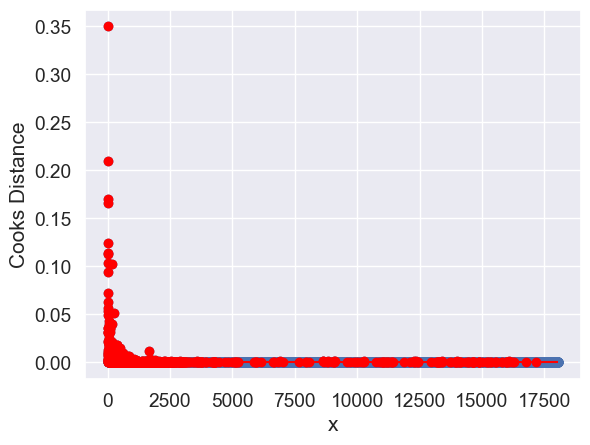

In [492]:
import matplotlib.pyplot as plt

plt.scatter(range(len(cooks[0])), cooks[0])
# Highlight the high leverage points
plt.scatter(high_leverage, cooks[0][high_leverage], color='red')
plt.hlines(4/len(model_df), 0, len(cooks[0]), color='red')
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()


<AxesSubplot: >

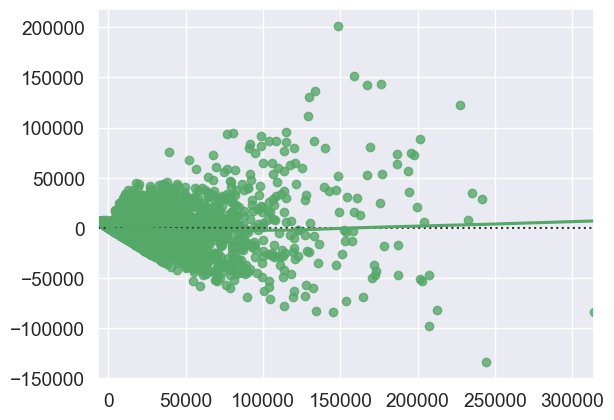

In [493]:
# Resdiuals vs fitted with seaborn
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color="g")

In [460]:
# Check which features have collinearity problem
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_.columns
vif["VIF Factor"] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]
vif.sort_values("VIF Factor", ascending=False).round(2)


,Features,VIF Factor
6,overall,1136.71
14,potential,745.32
17,height_cm,430.12
8,physic,298.08
13,movement_reactions,204.40
...,...,...
20,nationality_id,2.98
16,club_jersey_number,2.64
5,club_team_id,2.37
3,real_face,1.37


In [461]:
# Select the features with VIF < 5
new_X_ = X_[vif[vif["VIF Factor"] < 5]["Features"].values]
new_X_.head()

,real_face,club_team_id,club,club_jersey_number,nationality_id
0,1.0,21.0,1.0,1.0,21.0
1,1.0,240.0,1.0,9.0,60.0
2,1.0,45.0,1.0,1.0,37.0
3,1.0,73.0,1.0,6.0,27.0
4,1.0,44.0,1.0,37.0,43.0


In [499]:
X_.std()


international_reputation    2.413804e-01
power_stamina               1.620785e+01
age                         4.746692e+00
real_face                   2.757050e-01
attacking_short_passing     1.427759e+01
                                ...     
value                       3.714219e+06
mentality_aggression        1.682070e+01
nationality_id              5.117150e+01
league_level                7.521497e-01
mentality_composure         1.176191e+01
Length: 23, dtype: float64

In [504]:
w = np.ones(len(model.resid))

resid1 = model.resid[w == 1.0]
var1 = resid1.var(ddof=int(model.df_model) + 1)
resid2 = model.resid[w != 1.0]
var2 = resid2.var(ddof=int(model.df_model) + 1)
w_est = w.copy()
w_est[w != 1.0] = np.sqrt(var2) / np.sqrt(var1)
w_est 

array([1., 1., 1., ..., 1., 1., 1.])

In [509]:
model_df2 = (
    model_df.loc[~model_df.index.isin(high_leverage)].reset_index(drop=True).copy()
)
X, y = model_df2.drop(["wage"], axis=1).copy(), model_df2["wage"].copy()


X_ = X[feats]

# WLS model with the weights being 1 over the standard deviation
# model = sm.WLS(y, sm.add_constant(X_)).fit()
# Take the log of the features, if there is an error then leave the original column
# Build WLS model with the weights being the standard deviation of the features

# model = sm.WLS(y, X_, weights=1.0 / ((w_est ** 2)) ).fit()
model = sm.OLS(y, X_ ).fit()


model.summary()
# Resdiuals vs fitted with seaborn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              5002.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:36:31   Log-Likelihood:                     -1.6625e+05
No. Observations:               17001   AIC:                                  3.325e+05
Df Residuals:                   16978   BIC:                                  3.327e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
international_reputation    7385.9473    169.540     43.565      0.000    7053.632    7718.263
power_stamina                 -9.9731      4.647     -2.146      0.032     -19.081      -0.865
age                          -43.0806     14.583     -2.954      0.003     -71.665     -14.496
real_face                   3551.4768    133.546     26.594      0.000    3289.712    3813.241
attacking_short_passing       -6.0460      5.766     -1.049      0.294     -17.347       5.255
club_team_id                  -0.0183      0.001    -27.574      0.000      -0.020      -0.017
overall                      334.1586     16.918     19.752      0.000     300.998     367.319
attacking_heading_accuracy    37.2942      4.586      8.133      0.000      28.306      46.283
physic                       -18.5362      8.679     -2.136      0.033     -35.548      -1.524
club                         2.18e+04    384.365     56.710      0.000     2.1e+04    2.26e+04
release_clause                -0.0004   4.31e-05     -8.704      0.000      -0.000      -0.000
power_shot_power               9.7290      3.468      2.805      0.005       2.931      16.527
movement_balance             -31.7029      3.507     -9.040      0.000     -38.577     -24.829
movement_reactions            19.2005      7.661      2.506      0.012       4.184      34.217
potential                   -130.5522     12.688    -10.289      0.000    -155.422    -105.682
player_positions_GK         1091.3398    386.152      2.826      0.005     334.442    1848.237
club_jersey_number             9.8327      1.948      5.047      0.000       6.014      13.651
height_cm                    -86.8572      3.749    -23.165      0.000     -94.207     -79.508
value                          0.0022   8.54e-05     25.316      0.000       0.002       0.002
mentality_aggression          11.5304      4.077      2.828      0.005       3.538      19.522
nationality_id                 2.4599      0.720      3.418      0.001       1.049       3.870
league_level                -291.0734     48.302     -6.026      0.000    -385.750    -196.397
mentality_composure            4.9460      5.362      0.922      0.356      -5.565      15.457
==============================================================================
Omnibus:                     4246.550   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19879.823
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.781   Cond. No.                     1.06e+08
==============================================================================

Notes:
[1] R² is computed without cente

In [511]:
from statsmodels.stats.outliers_influence import OLSInfluence
diagnose = OLSInfluence(model)
diagnose.summary_frame().head()

,dfb_international_reputation,dfb_power_stamina,dfb_age,dfb_real_face,dfb_attacking_short_passing,dfb_club_team_id,dfb_overall,dfb_attacking_heading_accuracy,dfb_physic,dfb_club,dfb_release_clause,dfb_power_shot_power,dfb_movement_balance,dfb_movement_reactions,dfb_potential,dfb_player_positions_GK,dfb_club_jersey_number,dfb_height_cm,dfb_value,dfb_mentality_aggression,dfb_nationality_id,dfb_league_level,dfb_mentality_composure,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.033091,0.004170,-0.002478,-0.004942,0.002434,-0.000741,0.002565,-0.000332,-0.002883,0.018254,-0.003380,-0.001667,-0.008687,0.000498,0.001110,0.002105,-0.003400,-0.008604,0.000763,-0.001997,0.001215,0.001849,-0.001451,0.000081,0.272803,0.024338,0.043087,0.272796,0.043086
1,0.206119,-0.001389,0.011731,-0.050127,-0.010292,0.011855,-0.024632,0.007922,0.023939,0.081498,0.146634,0.013703,0.018749,0.005040,-0.010837,-0.003526,-0.013174,-0.029311,-0.134372,-0.008958,0.006066,0.010223,-0.011514,0.004493,1.959568,0.026207,0.321469,1.959732,0.321495
2,0.001945,-0.014904,-0.034507,0.011467,0.043108,0.004277,0.017252,0.009986,0.045688,-0.075812,0.206081,0.013045,0.016816,0.006439,-0.027109,0.007138,0.013482,-0.031977,-0.218922,-0.025328,0.004090,-0.008918,0.001509,0.003728,-1.814297,0.025390,-0.292837,-1.814420,-0.292857
3,0.079897,0.023525,-0.118278,0.049791,-0.016109,-0.021877,0.110217,0.011579,0.031722,-0.022749,0.184546,0.059647,-0.052006,0.027923,-0.037147,-0.004257,-0.002065,-0.100125,-0.252751,-0.038913,0.020924,-0.025146,-0.013440,0.013731,-2.746714,0.040178,-0.561971,-2.747243,-0.562080
4,0.077603,0.017193,-0.092348,0.035558,0.015834,-0.011022,0.093694,-0.005645,0.012922,-0.027410,0.288484,0.060224,-0.007528,0.011384,-0.046805,0.020440,-0.035623,-0.082970,-0.341261,-0.002442,0.009980,-0.024806,-0.012728,0.011864,-2.424428,0.044365,-0.522374,-2.424777,-0.522449


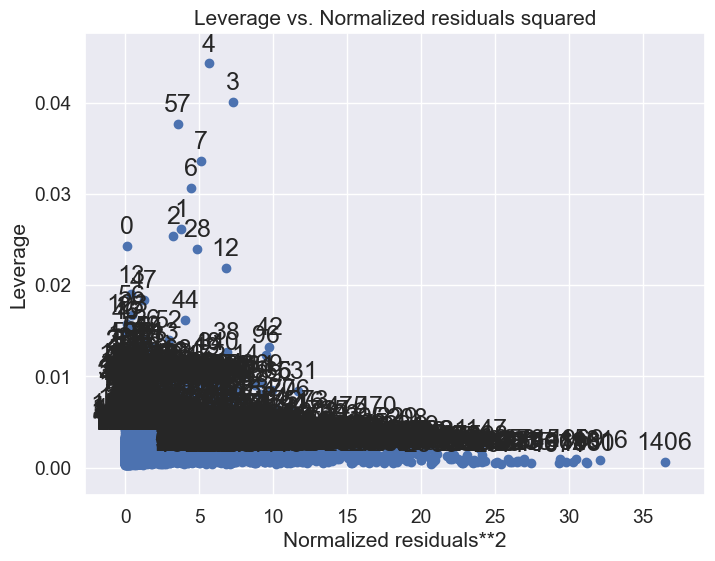

In [510]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(model, ax=ax)

<AxesSubplot: >

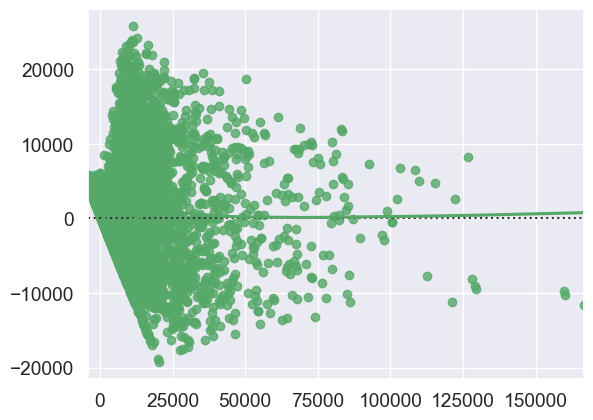

In [507]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color="g")

In [462]:
cls = Linear_Reg_Diagnostic(model)

<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

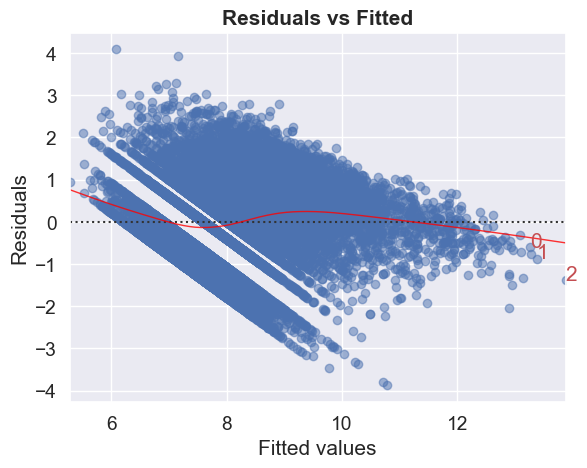

In [292]:
cls.residual_plot()

<AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

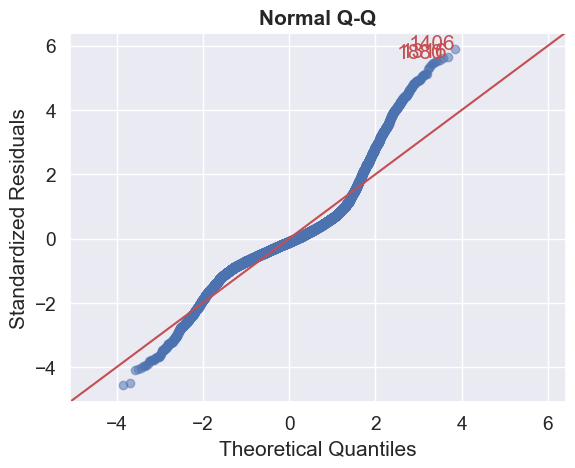

In [463]:
cls.qq_plot()

<AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

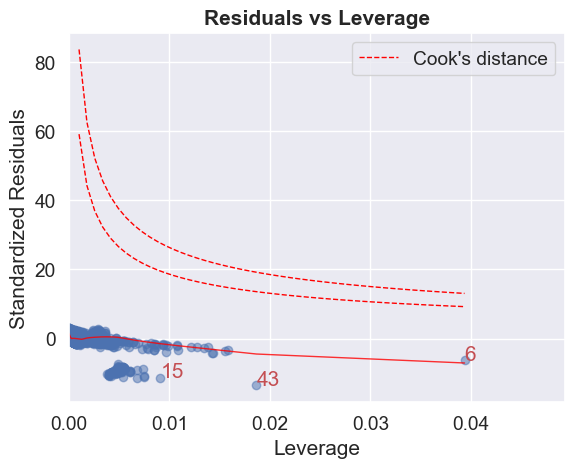

In [268]:
cls.leverage_plot()


### Modeling with XGBOOST

In [332]:
# Get the most important features by permutation importance
from sklearn.inspection import permutation_importance
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# build the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# get the score
score = model.score(X_test, y_test)
print(score)


0.9216932792138608


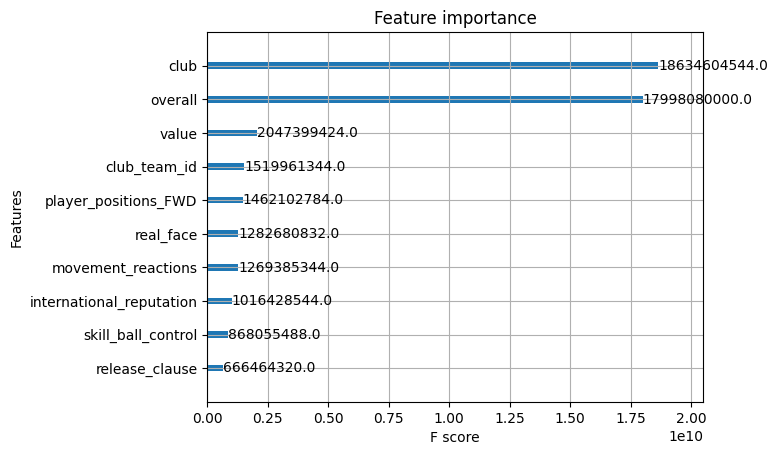

In [333]:
# XGBoost feature importance visualization
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

In [334]:
# Plot the feature importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.5706 ± 0.0339,overall
0.2152 ± 0.0139,club_team_id
0.0907 ± 0.0062,club
0.0435 ± 0.0041,release_clause
0.0370 ± 0.0033,value
0.0134 ± 0.0066,age
0.0101 ± 0.0033,league_level
0.0099 ± 0.0008,skill_ball_control
0.0087 ± 0.0057,skill_fk_accuracy
0.0054 ± 0.0006,movement_reactions


In [337]:
# Get permuation in a dataframe
perm_importance = pd.DataFrame(perm.feature_importances_, index=X_test.columns, columns=['importance'])
perm_importance.sort_values('importance', ascending=False, inplace=True)
perms = perm_importance.head(22)

## Only Numerical Features

In [152]:
num = fifa_df.select_dtypes(include=['number']).reset_index(drop=True)
util.print(num)

,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,1369.0,10.0,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1353.0,9.0,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1354.0,7.0,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,NaN,NaN,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1325.0,7.0,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,NaN,NaN,3,2,1,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN
19235,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,NaN,NaN,3,2,1,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN
19236,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,NaN,NaN,3,2,1,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN
19237,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,NaN,NaN,3,2,1,239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN


In [156]:
# Check for infinate values
num.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill missing values with mean column values in the train set
num.fillna(0, inplace=True)

In [157]:
# Prepare X and y
X, y = num.drop(['overall', 'potential', 'value', 'release_clause', 'wage'],
                axis=1).copy().reset_index(drop=True), num['wage'].copy().reset_index(drop=True)

In [158]:
# Get the most important features by permutation importance
from sklearn.inspection import permutation_importance
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# get the score
score = model.score(X_test, y_test)
print(score)

0.879509808446282


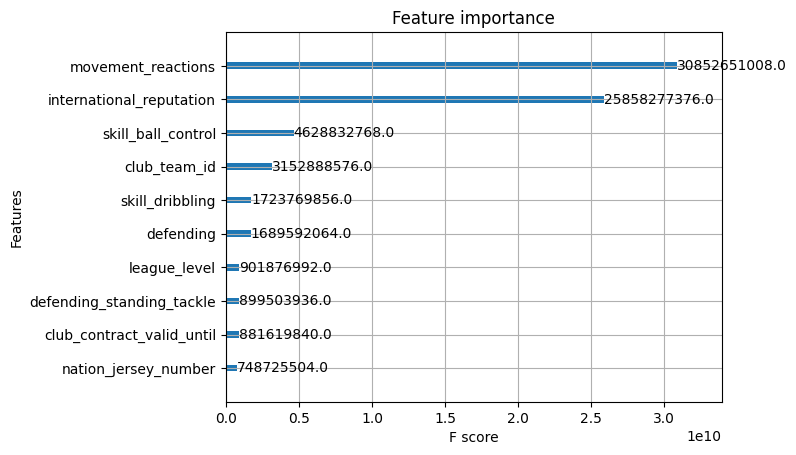

In [159]:
# XGBoost feature importance visualization
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

In [160]:
# Get the 20 most important features
importance = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
32,movement_reactions,0.355080
12,international_reputation,0.297600
28,skill_ball_control,0.053273
3,club_team_id,0.036286
24,skill_dribbling,0.019839
...,...,...
29,movement_acceleration,0.002222
23,attacking_volleys,0.001691
38,power_long_shots,0.001535
42,mentality_vision,0.001523


In [161]:
# Plot the feature importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.2260 ± 0.0116,movement_reactions
0.2133 ± 0.0157,club_team_id
0.0384 ± 0.0020,international_reputation
0.0380 ± 0.0022,skill_ball_control
0.0261 ± 0.0284,age
0.0184 ± 0.0025,defending
0.0121 ± 0.0039,attacking_crossing
0.0115 ± 0.0033,league_level
0.0082 ± 0.0079,club_contract_valid_until
0.0078 ± 0.0016,attacking_short_passing


In [162]:
# X = X.fillna(X.mean())
fit = sm.OLS(y, X).fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              645.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:11:32   Log-Likelihood:                     -2.0919e+05
No. Observations:               19239   AIC:                                  4.185e+05
Df Residuals:                   19185   BIC:                                  4.189e+05
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
age                          -587.0967     26.954    -21.782      0.000    -639.928    -534.265
height_cm                    -389.0231     13.650    -28.499      0.000    -415.779    -362.267
weight_kg                      33.4843     23.498      1.425      0.154     -12.573      79.542
club_team_id                   -0.0323      0.002    -17.079      0.000      -0.036      -0.029
league_level                 -462.3887    135.964     -3.401      0.001    -728.890    -195.888
club_jersey_number             -8.4666      5.397     -1.569      0.117     -19.046       2.113
club_contract_valid_until       5.8996      0.801      7.367      0.000       4.330       7.469
nationality_id                  8.6527      2.077      4.166      0.000       4.582      12.724
nation_team_id                 -0.0268      0.013     -2.073      0.038      -0.052      -0.001
nation_jersey_number          648.6779     36.488     17.778      0.000     577.159     720.197
weak_foot                    -122.6458    150.830     -0.813      0.416    -418.286     172.994
skill_moves                  1567.5690    220.875      7.097      0.000    1134.634    2000.504
international_reputation     2.695e+04    288.622     93.363      0.000    2.64e+04    2.75e+04
pace                          148.7632    224.000      0.664      0.507    -290.297     587.823
shooting                     -155.8395    124.288     -1.254      0.210    -399.455      87.776
passing                      -122.9249     70.633     -1.740      0.082    -261.372      15.522
dribbling                     109.2360    102.871      1.062      0.288     -92.399     310.871
defending                     -58.6457    117.050     -0.501      0.616    -288.073     170.782
physic                        -96.2571     45.105     -2.134      0.033    -184.666      -7.848
attacking_crossing             73.6867     18.975      3.883      0.000      36.494     110.880
attacking_finishing           116.3191     57.415      2.026      0.043       3.781     228.857
attacking_heading_accuracy    137.3325     17.973      7.641      0.000     102.104     172.561
attacking_short_passing        85.0347     30.499      2.788      0.005      25.253     144.816
attacking_volleys             -11.9906     15.761     -0.761      0.447     -42.883      18.902
skill_dribbling               -61.1110     49.967     -1.223      0.221    -159.051      36.829
skill_curve                    24.6675     14.503      1.701      0.089      -3.760      53.095
skill_fk_accuracy              10.2519     12.919      0.794      0.427     -15.071      35.575
skill_long_passing             17.6180     20.370      0.865      0.387     -22.309      57.545
skill_ba